In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.metrics import silhouette_score
import haversine as hs
from haversine import Unit
import json, urllib
import geopandas as gpd
import contextily as ctx
from pyproj import Proj, transform
from shapely.geometry import Point, Polygon
import pyarrow.parquet as pq
import gzip
import shutil
import os
import dask
import requests
from dask.distributed import Client
from dask import dataframe as dd
import osmnx as ox
import networkx as nx
import datetime
umni2 = "/home/umni2/a/umnilab/users/mittal53/WB_Delhi/processed_files/"
import random
colors = ["r","b","g","c","m","y","k","orange","gold","lime","aquamarine","deepskyblue","lightcoral","lightsalmon"]

In [98]:
m_y = [[3,2019], [3,2020], [3,2021]]
m_y = [[3,2021]]
max_days = [7, 7, 7]
cols_all = ['device_id', 'timestamp','lat','lon', 'horizontal_accuracy']
cols_all = ["Device_ID", "ID_type", "Latitude", "Longitude", "Horizontal_accuracy", "Timestamp", "IP_Address", "Device_OS", "Device_OS_version", "User_Agent", "Country_code", "Source_ID", "Publisher_ID", "App_ID", "Location_context", "Geohash"]

for cnt in range(0, len(m_y)):
    month = m_y[cnt][0]
    year = m_y[cnt][1]
    df=0
    path = f"/export/scratch/a/verma99/quadrant/Indiana/year={year}/month={month:02d}/"
    for cnt0 in range(1, max_days[cnt]+1):
        print(cnt0, month, year)
        files = os.listdir(path+f"day={cnt0:02d}")
        file_num = 0
        for file_name in files:
            if ".gz" in file_name:
#                 print(file_num)
                file_num = file_num+1
                file = pd.read_csv(path+f"day={cnt0:02d}/{file_name}", compression='gzip', header=None, error_bad_lines=False, names=cols_all)
                file["datetime"] = pd.to_datetime(file['Timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
                file["Date"] = file.datetime.dt.date.values
                file["Hour"] = file.datetime.dt.hour.values
                file = file[["Device_ID","Hour", "Date"]]
#                 file["time_s"] = (file.datetime.dt.hour.values*3600) + (file.datetime.dt.minute.values*60) + (file.datetime.dt.second.values)
                if type(df)==int:
                    df = file
                else:
                    df = df.append(file, ignore_index=True)

1 3 2021


/home/umni2/a/umnilab/apps/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2 3 2021


/home/umni2/a/umnilab/apps/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


3 3 2021
4 3 2021


/home/umni2/a/umnilab/apps/Anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


5 3 2021
6 3 2021
7 3 2021


In [86]:
# data_here = df.groupby(["Date","Hour"])["Device_ID"].agg(['count', 'nunique']).reset_index()
# data_here.columns = ["Date", "Hour", "Pings", "Users"]



Text(0.5, 0, 'Hour')

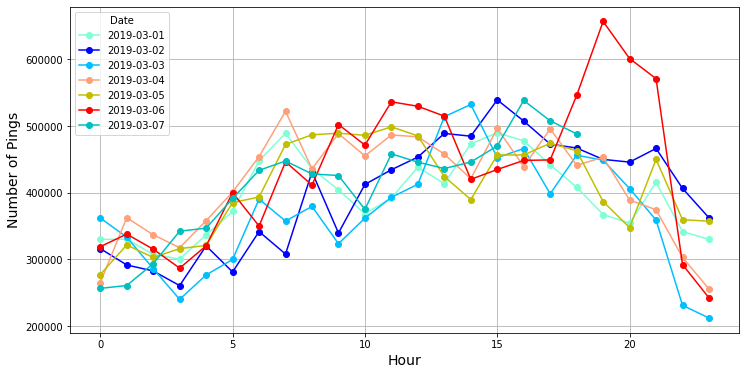

In [97]:
# 2019 first 7 days

data_here = df[df.Date!=datetime.date(2019, 2, 28)].groupby(["Date","Hour"])["Device_ID"].count().reset_index()
fig, ax = plt.subplots(figsize=(12,6))
data_here.pivot(index="Hour", columns="Date", values="Device_ID").plot(ax=ax, kind="line", grid=True, marker="o", color=random.sample(colors, 7))
plt.ylabel("Number of Pings", fontsize=14)
plt.xlabel("Hour", fontsize=14)

Text(0.5, 0, 'Hour')

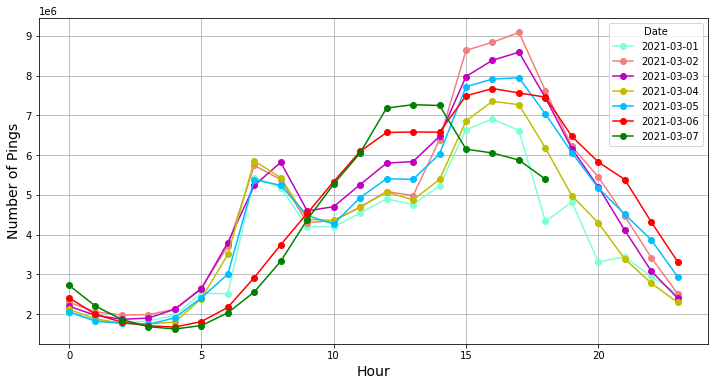

In [100]:
# 2021 first 7 days

data_here = df[df.Date!=datetime.date(2021, 2, 28)].groupby(["Date","Hour"])["Device_ID"].count().reset_index()
fig, ax = plt.subplots(figsize=(12,6))
data_here.pivot(index="Hour", columns="Date", values="Device_ID").plot(ax=ax, kind="line", grid=True, marker="o", color=random.sample(colors, 7))
plt.ylabel("Number of Pings", fontsize=14)
plt.xlabel("Hour", fontsize=14)
plt.title("2021 Data", fontsize=16)

In [99]:
df.Date.unique()

array([datetime.date(2021, 2, 28), datetime.date(2021, 3, 1),
       datetime.date(2021, 3, 2), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 6), datetime.date(2021, 3, 7)], dtype=object)